In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv("spam.csv", encoding='latin1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#1. Data Cleaning
#2. EDA
#3. Text Preprocessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website

## 1. Data  Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
# drop last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [11]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# renaming the cols
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [13]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df["target"]=encoder.fit_transform(df["target"])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
#Check for duplicated values
df.duplicated().sum()

403

In [19]:
df=df.drop_duplicates(keep="first")

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## 2. EDA

In [23]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

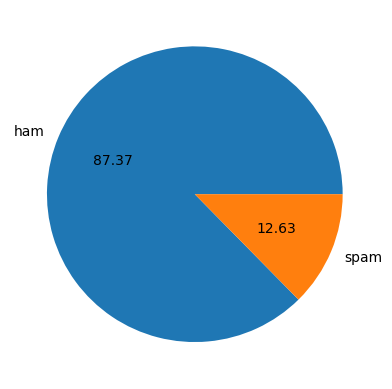

In [25]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [26]:
# Data is imbalanced

In [27]:
import nltk

In [28]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df["num_characters"] = df["text"].apply(len)

In [30]:
# num of words
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
# num of sentences
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [234]:
df[["num_characters","num_words","num_sentences"]].describe().round(3)

,num_characters,num_words,num_sentences
count,5169.000,5169.000,5169.000
mean,78.978,18.456,1.966
std,58.236,13.325,1.449
min,2.000,1.000,1.000
25%,36.000,9.000,1.000
50%,60.000,15.000,1.000
75%,117.000,26.000,2.000
max,910.000,220.000,38.000


In [230]:
#Ham
df[df["target"]==0][["num_characters","num_words","num_sentences"]].describe().round(3)

,num_characters,num_words,num_sentences
count,4516.000,4516.000,4516.000
mean,70.459,17.124,1.820
std,56.358,13.494,1.384
min,2.000,1.000,1.000
25%,34.000,8.000,1.000
50%,52.000,13.000,1.000
75%,90.000,22.000,2.000
max,910.000,220.000,38.000


In [232]:
#Spam
df[df["target"]==1][["num_characters","num_words","num_sentences"]].describe().round(3)

,num_characters,num_words,num_sentences
count,653.000,653.000,653.000
mean,137.891,27.668,2.971
std,30.138,7.008,1.488
min,13.000,2.000,1.000
25%,132.000,25.000,2.000
50%,149.000,29.000,3.000
75%,157.000,32.000,4.000
max,224.000,46.000,9.000


In [36]:
import seaborn as sns

In [37]:
df[df["target"]==0]["num_characters"]

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_characters, Length: 4516, dtype: int64

In [38]:
import seaborn as sns

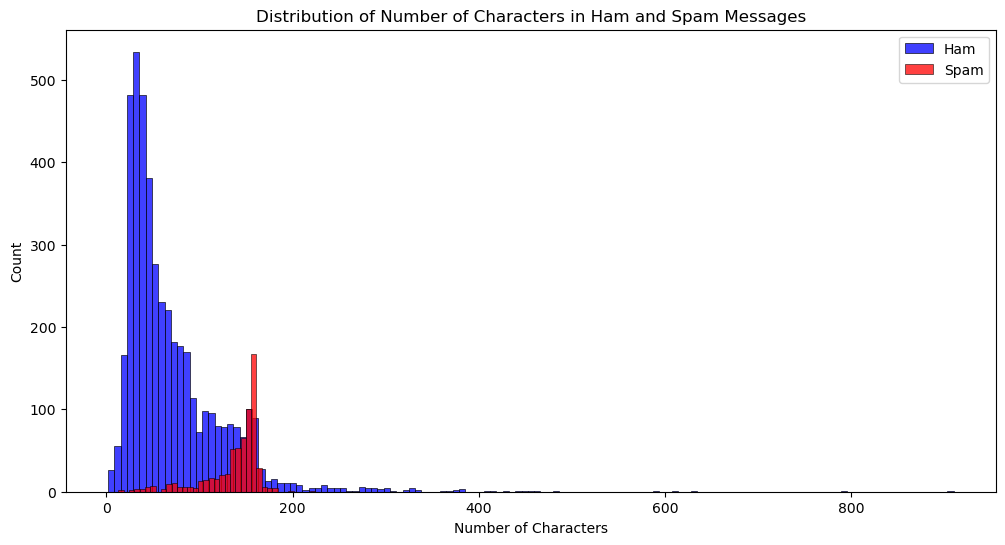

In [236]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["target"] == 0]["num_characters"], color="blue", label="Ham", kde=False)
sns.histplot(df[df["target"] == 1]["num_characters"], color="red", label="Spam", kde=False)
plt.xlabel("Number of Characters")
plt.ylabel("Count")
plt.title("Distribution of Number of Characters in Ham and Spam Messages")
plt.legend()
plt.show()

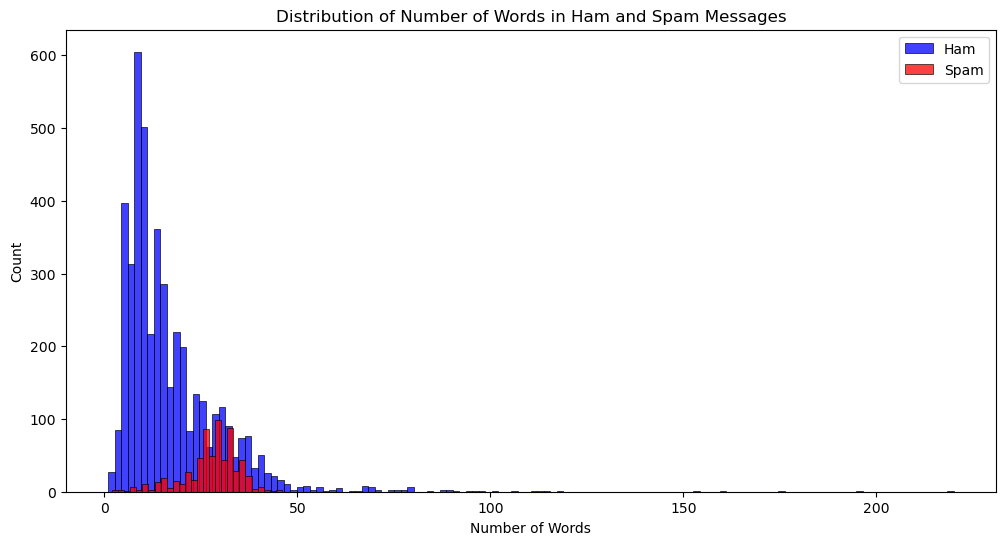

In [238]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df["target"] == 0]["num_words"], color="blue", label="Ham", kde=False)
sns.histplot(df[df["target"] == 1]["num_words"], color="red", label="Spam", kde=False)
plt.xlabel("Number of Words")
plt.ylabel("Count")
plt.title("Distribution of Number of Words in Ham and Spam Messages")
plt.legend()
plt.show()


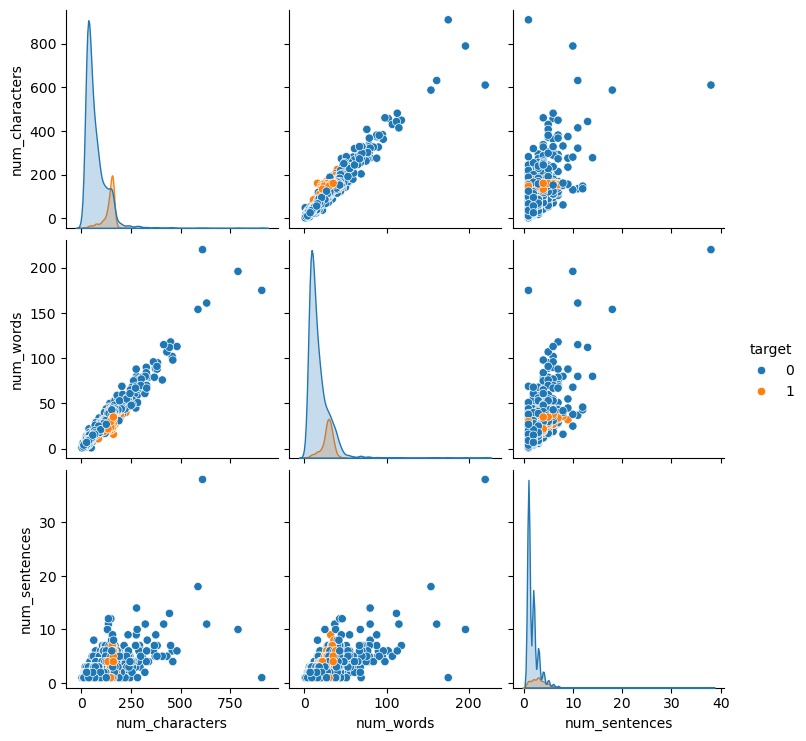

In [41]:
sns.pairplot(df,hue='target')

<Axes: >

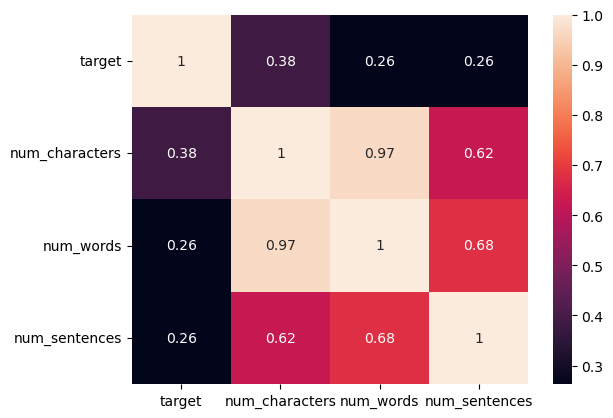

In [42]:
sns.heatmap(df[["target", "num_characters", "num_words", "num_sentences"]].corr(), annot=True)

## 3.Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [44]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [48]:
def transform_text(text):
    text= text.lower()
    text=nltk.word_tokenize(text)
    y=[]

    for i in text:
        if i.isalnum():
            y.append(i)  

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [49]:
df["transformed_text"]=df["text"].apply(transform_text)

In [50]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [51]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [52]:
#Spam
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

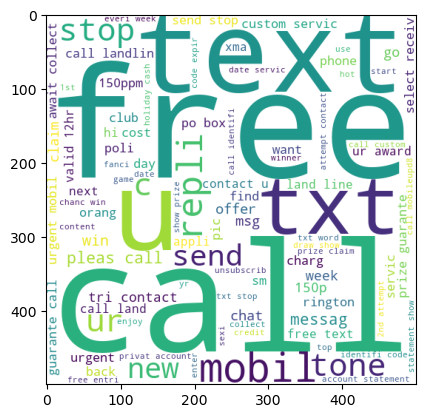

In [53]:
plt.imshow(spam_wc)

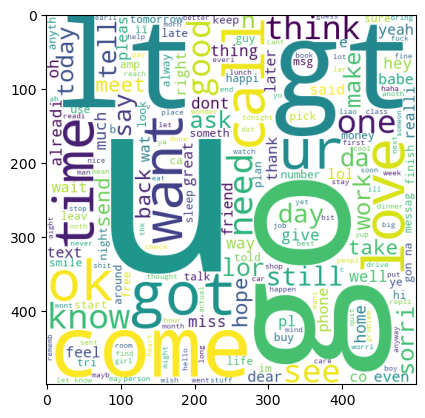

In [54]:
#Ham
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(ham_wc)

In [55]:
#spam
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter

In [58]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


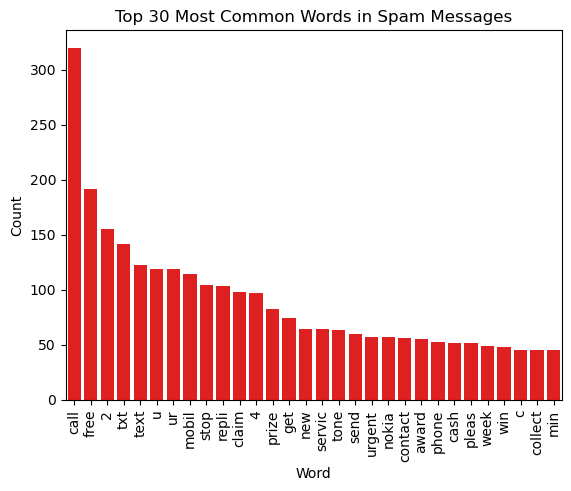

In [252]:
sns.barplot(x="Word", y="Count", data=common_words_df, color="red")  # Set the bar color to red
plt.xticks(rotation="vertical")
plt.title("Top 30 Most Common Words in Spam Messages")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

In [60]:
#ham
ham_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus)

35404

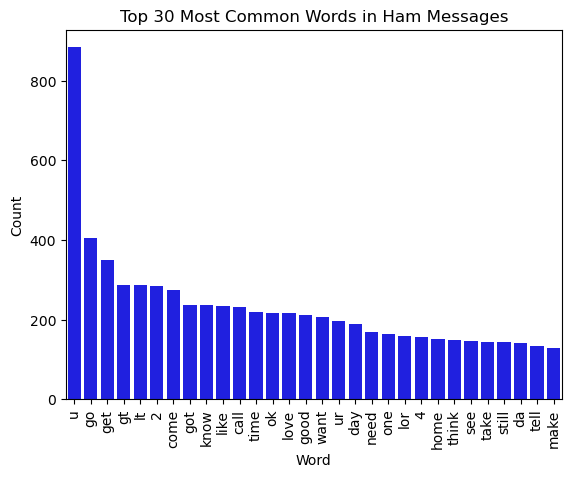

In [250]:
common_words_dfh = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=["Word", "Count"])
plt.title("Top 30 Most Common Words in Ham Messages")
sns.barplot(x="Word", y="Count", data=common_words_dfh, color="blue") 
plt.xticks(rotation="vertical")
plt.xlabel("Word")
plt.ylabel("Count")
plt.show()

## 4. Model Building

In [294]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [296]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [298]:
X.shape

(5169, 3000)

In [300]:
y = df['target'].values

In [302]:
from sklearn.model_selection import train_test_split

In [304]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [342]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [344]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [346]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes")
print("\nAccuracy - ",accuracy_score(y_test,y_pred1))
print("\nConfusion Matrix -\n ",confusion_matrix(y_test,y_pred1))
print("\nPrecision - ",precision_score(y_test,y_pred1))

Gaussian Naive Bayes

Accuracy -  0.8694390715667312

Confusion Matrix -
  [[788 108]
 [ 27 111]]

Precision -  0.5068493150684932


In [348]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes")
print("\nAccuracy - ",accuracy_score(y_test,y_pred2))
print("\nConfusion Matrix -\n ",confusion_matrix(y_test,y_pred2))
print("\nPrecision - ",precision_score(y_test,y_pred2))

Multinomial Naive Bayes

Accuracy -  0.9709864603481625

Confusion Matrix -
  [[896   0]
 [ 30 108]]

Precision -  1.0


In [350]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Bernoulli Navie Bayes")
print("\nAccuracy - ",accuracy_score(y_test,y_pred3))
print("\nConfusion Matrix -\n ",confusion_matrix(y_test,y_pred3))
print("\nPrecision - ",precision_score(y_test,y_pred3))

Bernoulli Navie Bayes

Accuracy -  0.9835589941972921

Confusion Matrix -
  [[895   1]
 [ 16 122]]

Precision -  0.991869918699187


In [352]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [354]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [356]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [358]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [163]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [165]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [167]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [169]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


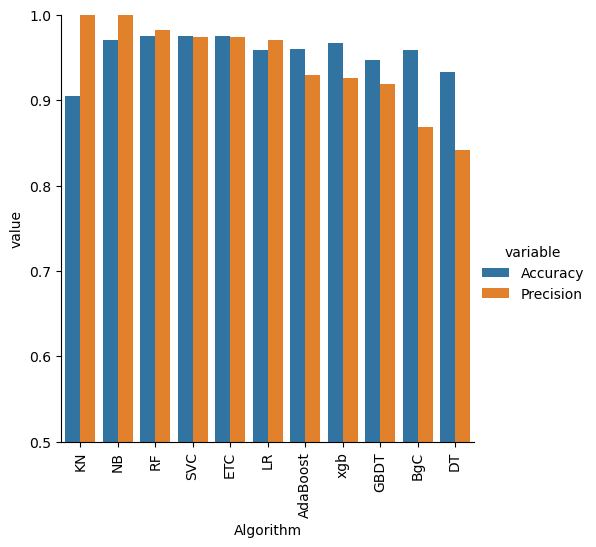

In [171]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [326]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [328]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)],voting='soft')

In [330]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2))],
                 voting='soft')

In [332]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9831932773109243


In [334]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('rf', rfc)]
final_estimator=RandomForestClassifier()

In [336]:
from sklearn.ensemble import StackingClassifier

In [338]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [340]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9748549323017408
Precision 0.9307692307692308


## 5. Test Final Model

In [368]:
# Sample messages
input_sentences = [
    "You have been selected for a premium membership. Click here to activate: http://bit.ly/premium.",  # SPAM
    "Hi, how are you? Just wanted to check in and say hello.",  # NOT SPAM
    "Congratulations! You’ve won a $1000 gift card. Call now to claim your prize.",  # SPAM
    "Don't forget our meeting tomorrow at 10 AM."  # NOT SPAM
]

# Classify each sentence
for input_sentence in input_sentences:
    transformed_sentence = transform_text(input_sentence)
    vectorized_input = tfidf.transform([transformed_sentence]).toarray()
    prediction = mnb.predict(vectorized_input)[0]
    
    # Print result
    print(input_sentence)  # Print the sentence
    if prediction == 1:
        print("SPAM\n")
    else:
        print("NOT SPAM\n")


You have been selected for a premium membership. Click here to activate: http://bit.ly/premium.
SPAM

Hi, how are you? Just wanted to check in and say hello.
NOT SPAM

Congratulations! You’ve won a $1000 gift card. Call now to claim your prize.
SPAM

Don't forget our meeting tomorrow at 10 AM.
NOT SPAM

